# Example 6.4

For the element in the figure below, find the principal stresses and their orientation using the equations and the Pole's method. Find the stresses acting at the indicated angle.

## Data:

$\sigma_x=50$ kPa

$\sigma_y=25$ kPa

$\tau_{xy}=-12.5$ kPa

$\alpha=-20$ degrees

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def Get_stress_at_alpha(S_Tensor, alpha):
    #alpha in radians
    s_m=(S_Tensor[0][0]+S_Tensor[1][1])/2
    s_d=S_Tensor[1][1]-S_Tensor[0][0]
    sigma_alpha= s_m+ 0.5*s_d*np.cos(2*alpha)+S_Tensor[0][1]*np.sin(2*alpha)
    tau_alpha=0.5*s_d*np.sin(2*alpha)-S_Tensor[0][1]*np.cos(2*alpha)
    return sigma_alpha, tau_alpha

In [8]:
# Set Tau to zero and find principal stresses
def Get_principal_stresses(S):
    s_d=S[1][1]-S[0][0]
    alpha=0.5*np.arctan(2*S[0][1]/s_d)
    beta=alpha+0.5*np.pi
    s1, _=Get_stress_at_alpha(S, alpha)
    s2,_=Get_stress_at_alpha(S, beta)
    if (s1>s2):
        s_1a=s1
        s_2a=s2
    else:
        s_1a=s2
        s_2a=s1
    return s_1a, s_2a, alpha, beta

In [9]:
S=[[50, -12.5], [12.5, 25]]
s1, s2, alpha, beta=Get_principal_stresses(S)
print(r'Sigma_1= %1.2f kPa' % s1)
print(r'Sigma_3= %1.2f kPa' % s2)
print(r'alpha= %1.2f degrees' % (alpha*180/np.pi))
print(r'beta= %1.2f degrees' % (beta*180/np.pi))

Sigma_1= 55.18 kPa
Sigma_3= 19.82 kPa
alpha= 22.50 degrees
beta= 112.50 degrees


In [10]:
alpha=-20*np.pi/180
sigma_alpha, tau_alpha=Get_stress_at_alpha(S, alpha)

print('sigma_alpha= %1.2f kPa' % sigma_alpha)
print('tau_alpha= %1.2f kPa' % tau_alpha)

sigma_alpha= 35.96 kPa
tau_alpha= 17.61 kPa


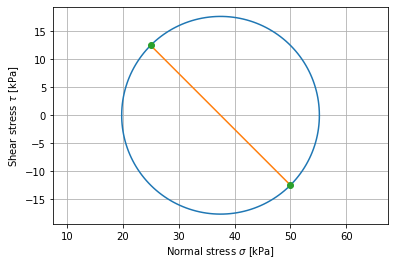

In [11]:
alpha=np.linspace(0, np.pi, 180)

sigma, tau=Get_stress_at_alpha(S, alpha)

plt.plot(sigma, tau)
plt.xlabel(r'Normal stress $\sigma$ [kPa]')
plt.ylabel(r'Shear stress $\tau$ [kPa]')

plt.plot([S[0][0], S[1][1]],[S[0][1], S[1][0]] )
plt.plot([S[0][0], S[1][1]],[S[0][1], S[1][0]], 'o' )
#plt.plot(sigma_alpha, tau_alpha, 'o')
plt.gca().axis('equal')
plt.gca().grid('True')